## 개요 

* 2024년 12회 산업통상자원부 공공데이터 활용 아이디어 공모전 참가해보기로 함
  * https://datacontest.kr/apply/applyAdd/3
* 사용하기로 한 지표에 대한 재조사 및 통합사용하기로 의견제안 예정
* 모델의 Feature로 원자재의 벌크운송에 대한 운임지수(BDI)사용 의견제안 예정

## 내용정리

### 지난 회의정리

* 모델링에 사용할 지표 2가지 선정
  * 수급안정화지수
  * 시장위험지수
* 광물별 가격 영향 미치는 요소 생각해보기
* 모델링 관련 아이디어

### 회의내용에 대한 Self고찰 및 아이디어 Develope
* 모델링에 사용할 지표에 대한 분석
  * 데이터를 살펴보다보니 둘의 움직임이 거의 같게 나타남
  * 가격리스크, 중장기적 시계 등 공통적인 요소가 서로 많은 지표임을 발견
  * 포함항목을 좀 더 구체적으로 명시한 `수급안정화지수로 통합사용 하는 것으로 의견 제안 예정`
     * 광종별 중장기 가격리스크, 세계 수급비율(공급/소비), 세계 공급(매장)편중도, 국내 수입증가율, 국내 수입국 편중도 등

<Axes: xlabel='기간'>

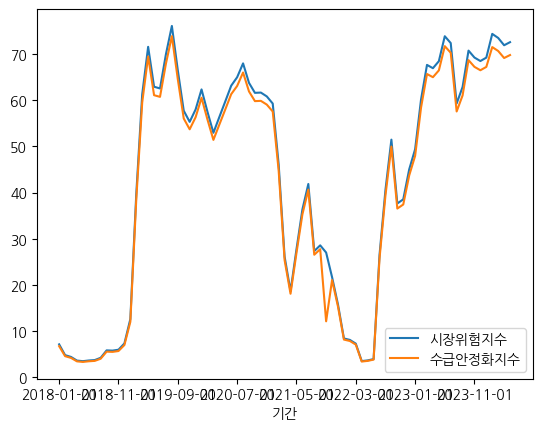

In [13]:
import pandas as pd
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt

df_source = pd.read_csv('비교_한국광해광업공단_수급안정화지수_코발트_20240520 (1).csv', encoding='cp949')
df_source[['기간','시장위험지수','수급안정화지수']].plot(x='기간')

* 광물별 고려요소 및 모델링에 쓸 데이터 관련 아이디어

  (1) 고려대상 광물들의 세계 생산량 비중 등을 고려할 때 `국제수송(수입)을 고려`해야할 것으로 보임
      * 조사를 통해 `상하이 컨테이너 운임지수(SCFI)`를 확인, 국가별 운임지수에 대한 가중치를 반영한 지표로 주요 수입국에 대해 반영 고려
        * 그러나 광물운송의 특성상 컨테이너로 운송하지 않기 때문에 다른 지수를 모색
      * 벌크선에 대한 지수인 `발틱운임지수(BDI)` 도입 검토
        * 공급 대비 운송량에 대한 수요를 알 수 있음
        * 벌크선은 광물, 곡물 등을 운송하므로 원자재에 대한 글로벌 수요와 공급을 간접적으로 측정
          원자재 소요에 대한 미래의 경제선행지표로도 간주되기도 함
        * 구체적인 운송수요가 있을 때만 예약되는 벌크선 특성상 특정 목적에 의해 조정되는 경우가 적음
        * 위키백과에서 위의 내용들 발췌 : https://en.wikipedia.org/wiki/Baltic_Dry_Index
      * `발틱운임지수(BDI)를 데이터로 사용하는 것으로 의견 제안 예정`
      
  (2) 주요 생산국에 대한 여러 요소의 고려
      * 전쟁, 전염병, 인건비 등을 대상으로 고려할 수는 없을지에 대한 고민
        * 수치화하기 어렵거나, 자료를 구하기 어려울 것으로 보여 일단 Drop     